## Correlation

Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis: "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".

by M. Hall 1999, [Correlation-based Feature Selection for Machine Learning](http://www.cs.waikato.ac.nz/~mhall/thesis.pdf)

I will demonstrate how to select features based on correlation using 2 meta-procedures:
- method of "brute force"
- method of "grouping"

The most used method to determine correlation is the Pearson's correlation method, which is the one that I will carry out in this notebook.

(Here, I will demonstrate how to identify constant features using a toy dataset.)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# load dataset

data = pd.read_csv('../dataset_2.csv', nrows=50000)
data.shape

(50000, 109)

In [3]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In practice, feature selection should be done after data pre-processing, so ideally, all the categorical variables are encoded into numbers, and a dataset is cleaned.

This dataset, for simplicity, contains only numerical variables.

**note**: In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfitting.

In [4]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

## Correlation heatmap

<AxesSubplot:>

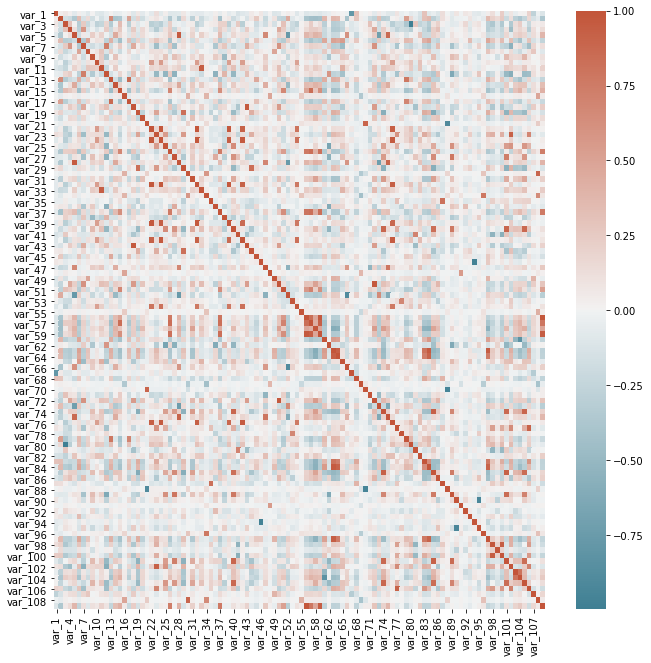

In [5]:
# visualise correlated features with method='pearson'

corrmat = X_train.corr(method='pearson')

# heatmap with the package seaborn to customise the colours of searborn's heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# some more customisation
fig, ax = plt.subplots()
fig.set_size_inches(11,11)

# plot
sns.heatmap(corrmat, cmap=cmap)

In the plot above, the dark orange squares correspond to highly correlated features (>0.8). Darker blue squares corresponds to negatively correlated features (<-0.8).

The diagonal represents the correlation of a feature with itself, therefore the value is 1.

We can see that there are a few features that are highly correlated.

## Correlation scatterplots

In [6]:
# here, there are some lines for detecting correlated features to a certain feature, say var_5

c = 0

# iterate over each correlation value for var_5:
for i in corrmat.loc['var_5']:
    if i>0.8:
        print(corrmat.columns[c], i)  
    c = c + 1

var_5 1.0
var_28 0.9536721652385074
var_75 0.8616179292025175


We see that the correlation of the second pair of variables is not quite linear.

Next, let's identify a couple of negatively correlated variables:

## Remove correlated

### 1. Brute force approach

In [7]:
def correlation(dataset, threshold):
    
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        
        for j in range(i):
            
            if abs(corr_matrix.iloc[i, j]) > threshold:
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
                
    return col_corr

In [8]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

0.8632980418993852 var_17 var_13
0.9813409653986886 var_24 var_22
0.9536721652385074 var_28 var_5
0.8341792843814487 var_29 var_19
0.9904307349993785 var_32 var_22
0.9804113632495275 var_32 var_24
0.9443605986205716 var_33 var_11
0.9744609333741692 var_39 var_22
0.943115386679052 var_39 var_24
0.9748779191363351 var_39 var_32
0.9191057911749927 var_42 var_22
0.9672922649953323 var_42 var_24
0.9199183443060889 var_42 var_32
0.8567453370819024 var_42 var_39
0.9654741987814612 var_43 var_18
0.8358214281472603 var_44 var_29
0.8150241475398569 var_54 var_24
0.8287090109274778 var_54 var_42
0.8374044816360672 var_57 var_15
0.8318090759398231 var_57 var_26
0.8207993837973165 var_57 var_37
0.8440857367712463 var_57 var_56
0.813194752522628 var_59 var_26
0.8306144274586847 var_59 var_37
0.9757443944210531 var_59 var_56
0.9223172758595206 var_59 var_57
0.9244600573582376 var_64 var_63
0.8925221926487126 var_66 var_52
0.8953971637379001 var_70 var_21
0.9702627369946087 var_72 var_50
0.88311916559

40

In [9]:
corr_features

{'var_101',
 'var_103',
 'var_11',
 'var_13',
 'var_15',
 'var_18',
 'var_19',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_26',
 'var_28',
 'var_29',
 'var_3',
 'var_30',
 'var_32',
 'var_35',
 'var_37',
 'var_39',
 'var_40',
 'var_42',
 'var_46',
 'var_5',
 'var_50',
 'var_52',
 'var_56',
 'var_57',
 'var_59',
 'var_60',
 'var_63',
 'var_64',
 'var_70',
 'var_74',
 'var_77',
 'var_84',
 'var_85',
 'var_89',
 'var_90',
 'var_98'}

In [10]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 68), (15000, 68))

By removing correlated columns we reduced the feature space from 108 numerical columns to 68.

### 2. "Grouping" approach

The second approach looks to identify groups of highly correlated features. And then, further investigation within these groups is made to decide which feature we keep and which one we remove.

In [11]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

In [12]:
# build a dataframe with the correlation between features

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack().sort_values(ascending=False)
corrmat = corrmat[(corrmat >= 0.8) & (corrmat < 1)] # above a threshold and not self-correlated
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,var_80,var_3,0.994923
1,var_3,var_80,0.994923
2,var_22,var_32,0.990431
3,var_32,var_22,0.990431
4,var_109,var_56,0.987777


In [13]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a current feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 26 correlated groups
out of 108 total features


In [14]:
# print out each group

for group in correlated_groups:
    print(group)
    print()

  feature1 feature2      corr
0   var_80    var_3  0.994923

   feature1 feature2      corr
2    var_22   var_32  0.990431
6    var_22   var_24  0.981341
15   var_22   var_39  0.974461
45   var_22   var_76  0.931911
59   var_22   var_42  0.919106

   feature1 feature2      corr
4   var_109   var_56  0.987777
34  var_109   var_59  0.944842

   feature1 feature2      corr
16   var_72   var_50  0.970263

   feature1 feature2      corr
18   var_46   var_94  0.967895

   feature1 feature2      corr
22   var_18   var_43  0.965474

   feature1 feature2      corr
26   var_63   var_84  0.959138
41   var_63   var_97  0.940184
52   var_63   var_64  0.924460

   feature1 feature2      corr
30    var_5   var_28  0.953672
94    var_5   var_75  0.861618

   feature1 feature2      corr
32   var_70   var_88  0.948947
72   var_70   var_21  0.895397

   feature1 feature2      corr
36   var_33   var_11  0.944361

   feature1 feature2      corr
42  var_100   var_98  0.938629

    feature1 feature2      cor

Build a machine learning algorithm using all the features from the above list, and select the more predictive one.

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)

In [16]:
def remove_correlation_with_grouping_approach(correlated_groups):
    
    print(f"Number of features in the original X_train BEFORE removing correlated features: {X_train.shape[1]}")
    print(f"Number of features in the original X_test BEFORE removing correlated features: {X_test.shape[1]}")
    print()
    print("Proceeding with removing correlated features ...")
    print()
    
    vars_to_drop = []

    for group in correlated_groups:

        features = list(group['feature2'].unique()) + list(group['feature1'].unique())

        # train a random forest 
        rf.fit(X_train[features].fillna(0), y_train)

        # get the sorted feature importance table
        importance = pd.concat(
            [pd.Series(features),
             pd.Series(rf.feature_importances_)], axis=1)
        importance.columns = ['feature', 'importance']
        importance.sort_values(by='importance', ascending=False, inplace=True)
        importance = importance.reset_index().drop(columns="index")

        # define not important correlated variables to drop
        vars_to_drop.extend(list(importance.iloc[1:,:].feature))
    
    # get the vars_to_drop unique values
    set1 = set(vars_to_drop)
    unique_vars_to_drop = list(set1)
    
    # drop not important correlated variables
    X_train.drop(labels=unique_vars_to_drop, axis=1, inplace=True)
    X_test.drop(labels=unique_vars_to_drop, axis=1, inplace=True)
    
    # print out the results
    
    print(f"Unique vars to drop: {unique_vars_to_drop}")
    print()
    print(f"Number of features in the X_train AFTER removing correlated features: {X_train.shape[1]}")
    print(f"Number of features in the X_test AFTER removing correlated features: {X_test.shape[1]}")

In [17]:
remove_correlation_with_grouping_approach(correlated_groups)

Number of features in the original X_train BEFORE removing correlated features: 108
Number of features in the original X_test BEFORE removing correlated features: 108

Proceeding with removing correlated features ...

Unique vars to drop: ['var_98', 'var_89', 'var_44', 'var_70', 'var_15', 'var_59', 'var_40', 'var_30', 'var_32', 'var_87', 'var_22', 'var_19', 'var_3', 'var_102', 'var_42', 'var_77', 'var_66', 'var_24', 'var_74', 'var_63', 'var_54', 'var_90', 'var_103', 'var_85', 'var_104', 'var_18', 'var_37', 'var_56', 'var_109', 'var_33', 'var_94', 'var_5', 'var_76', 'var_64', 'var_57', 'var_28', 'var_101', 'var_72', 'var_17', 'var_88', 'var_97']

Number of features in the X_train AFTER removing correlated features: 67
Number of features in the X_test AFTER removing correlated features: 67


**Noted**: None of the 2 procedures for removing correlated features are perfect, and some correlated features may escape the loops of code. So it might be worthwhile checking that after removing the correlated features, there are no correlated features left in the dataset. If there are, repeat the procedure to remove the remaining ones.

In [18]:
# build a dataframe with the correlation between features

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1] # not self-correlated
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a current feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 0 correlated groups
out of 67 total features
